In [21]:
 # Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [71]:
import sys
sys.path.append('/home/ubuntu/fastai/')
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from glob2 import glob
from sklearn.metrics import f1_score

In [23]:
# df = pd.DataFrame(columns=["file", "species"])

# for image in glob("/home/ubuntu/plants/data/train/**/*.png"):
#     dir_name = image.split('/')
#     file_name, species = dir_name[-1], dir_name[-2]

#     df = df.append({
#         "file": file_name,
#         "species": species
#         }, ignore_index=True)
# df.species.replace('/s+','_',regex=True,inplace =True)
# df.to_csv('labels.csv', index=False)

In [90]:
files = !ls /home/ubuntu/plants/Image-processing/train

In [85]:
filestest = !ls /home/ubuntu/plants/Image-processing/test/

In [87]:
x = []
y = []
for i, image in enumerate(filestest):
    img = plt.imread('/home/ubuntu/plants/Image-processing/test/'+image)
    x.append(img.shape[0])
    y.append(img.shape[1])

(array([ 98.,  86.,  84.,  89.,  73.,  74.,  83.,  76.,  65.,  66.]),
 array([ 200. ,  214.9,  229.8,  244.7,  259.6,  274.5,  289.4,  304.3,  319.2,  334.1,  349. ]),
 <a list of 10 Patch objects>)

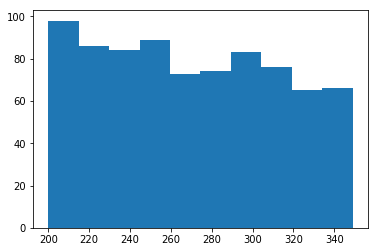

In [88]:
plt.hist(x)

(array([ 2920.,  1318.,   332.,   122.,    36.,    13.,     3.,     3.,     0.,     3.]),
 array([   49. ,   389.8,   730.6,  1071.4,  1412.2,  1753. ,  2093.8,  2434.6,  2775.4,  3116.2,  3457. ]),
 <a list of 10 Patch objects>)

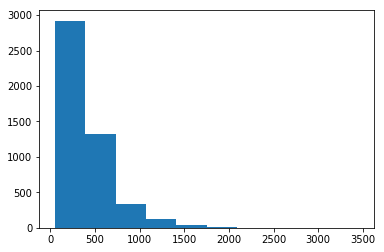

In [91]:
x = []
for i, image in enumerate(files):
    img = plt.imread('/home/ubuntu/plants/Image-processing/train/'+image)
    x.append(img.shape[0])
plt.hist(x,bins=50)

(array([   0.,    0.,   36.,  169.,  278.,  341.,  343.,  369.,  327.,  231.,   93.,   94.,   77.,   74.,
          77.,   71.,   56.,   77.,  151.,  115.,  120.,  107.,  106.,  115.,  111.,   77.,   89.,   65.,
          71.,   62.,   59.,   61.,   53.,   56.,   45.,   39.,   44.,   35.,   26.,   22.,   17.,   22.,
          20.,   17.,   18.,   16.,   17.,   16.,   14.,   15.]),
 array([    0.,    20.,    40.,    60.,    80.,   100.,   120.,   140.,   160.,   180.,   200.,   220.,   240.,
          260.,   280.,   300.,   320.,   340.,   360.,   380.,   400.,   420.,   440.,   460.,   480.,   500.,
          520.,   540.,   560.,   580.,   600.,   620.,   640.,   660.,   680.,   700.,   720.,   740.,   760.,
          780.,   800.,   820.,   840.,   860.,   880.,   900.,   920.,   940.,   960.,   980.,  1000.]),
 <a list of 50 Patch objects>)

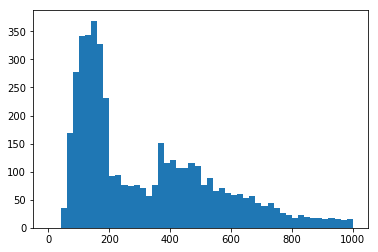

In [99]:

plt.hist(x,bins=50,range=[0,1000])


(175, 175, 3)
(140, 140, 3)
(756, 756, 3)
(350, 350, 3)
(1193, 1193, 3)


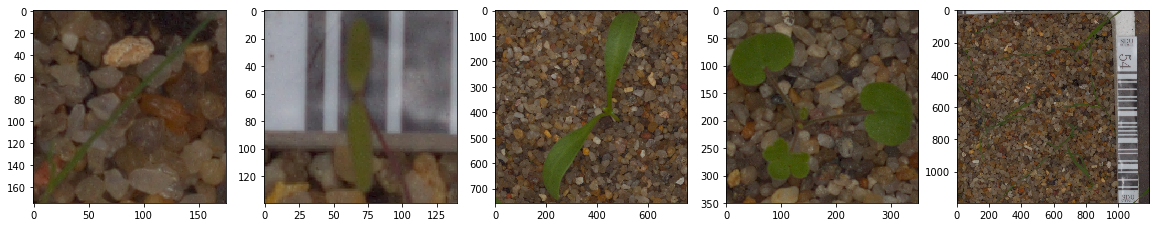

In [25]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(files):
    plt.subplot(1, columns, i + 1)
    img = plt.imread('/home/ubuntu/plants/Image-processing/train/'+image)
    plt.imshow(img)
    print(img.shape)

In [26]:
f_model = resnet50
PATH = '/home/ubuntu/plants/Image-processing/'
label_csv ='labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [72]:
def f1(preds, targs):
    preds = np.argmax(preds, 1)
    return f1_score(targs, preds, average='micro')

In [73]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    val_idxs=val_idxs, test_name='test')

In [74]:
data = get_data(64)

In [75]:
learn = ConvLearner.pretrained(f_model,data, ps=0.5,metrics=[f1])

In [40]:
learn.lr_find()
learn.sched.plot()

A Jupyter Widget









  0%|          | 0/60 [00:00<?, ?it/s]










Exception in thread Thread-14:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 95%|█████████▌| 57/60 [00:22<00:01,  2.51it/s, loss=15]  


In [76]:
lr =1e-2
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       1.37438  1.50435  0.50247]                     
[ 1.       1.49276  1.25247  0.57824]                     
[ 2.       1.40594  1.21991  0.58468]                     
[ 3.       1.37457  1.14885  0.60826]                     
[ 4.       1.29786  1.11637  0.61593]                     
[ 5.       1.21894  1.07449  0.63221]                     
[ 6.       1.18103  1.07727  0.62805]                     



In [77]:
lrs =np.array([1e-4,1e-3,1e-2])
learn.unfreeze()
learn.fit(lrs,n_cycle=3,cycle_len=1,cycle_mult=2)

A Jupyter Widget

[ 0.       1.07061  1.12918  0.60004]                     
[ 1.       0.98241  0.70868  0.7512 ]                     
[ 2.       0.74661  0.65189  0.7799 ]                      
[ 3.       0.63129  0.56057  0.80926]                      
[ 4.       0.50117  0.49572  0.83075]                      
[ 5.       0.39126  0.48065  0.83966]                      
[ 6.       0.33983  0.46301  0.84572]                      



In [78]:
sz = 128
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

100%|██████████| 13/13 [00:03<00:00,  3.50it/s]


A Jupyter Widget

[ 0.       0.60649  0.66814  0.76825]                      
[ 1.       0.65398  0.56622  0.8066 ]                      
[ 2.       0.61577  0.54342  0.8066 ]                      
[ 3.       0.57921  0.50138  0.82431]                      
[ 4.       0.54229  0.47253  0.82743]                      
[ 5.       0.50343  0.46183  0.83719]                      
[ 6.       0.49704  0.46255  0.83927]                      



In [79]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.26835  0.30586  0.88511]                      
[ 1.       0.28678  0.25488  0.90529]                      
[ 2.       0.24129  0.24111  0.91258]                      
[ 3.       0.21657  0.23484  0.91362]                      
[ 4.       0.18201  0.21149  0.92527]                      
[ 5.       0.15252  0.21159  0.92404]                      
[ 6.       0.12628  0.2017   0.92612]                      



In [100]:
sz = 256
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

100%|██████████| 13/13 [00:10<00:00,  1.30it/s]


A Jupyter Widget

[ 0.       0.25789  0.28499  0.89923]                      
[ 1.       0.29272  0.24373  0.91173]                      
[ 2.       0.28364  0.24306  0.91505]                      
[ 3.       0.27997  0.22456  0.92319]                      
[ 4.       0.25807  0.22061  0.92006]                      
[ 5.       0.23295  0.2197   0.92651]                      
[ 6.       0.23069  0.22024  0.92234]                      



In [101]:
pred,y = learn.TTA()

In [102]:
f1(pred,y)

0.92947368421052634

In [111]:
submission, test_y = learn.TTA(is_test=True)

In [116]:
np.exp(submission[0]).sum()

0.99926817

In [104]:
submission = np.argmax(np.exp(submission),axis=1)

In [110]:
submission

array([ 5,  5,  6,  8, 10, 11,  8,  2,  1,  3,  5, 11,  1,  3,  3, 10,  6,  8,  5,  6,  8, 10,  6, 11, 10,  2,
        5,  7,  2,  1,  3,  1,  5,  9,  3,  1,  3,  9,  5,  5,  4,  0,  1,  1, 10,  8,  6, 10, 11,  2,  6,  3,
        2,  1,  8, 10,  7,  8, 10,  6,  5,  5,  5,  9,  9,  4,  3,  7,  0,  1,  6,  6,  6, 11,  5,  6,  3,  9,
        1,  3,  5,  9,  8, 11,  1, 11,  7,  6,  6,  5,  9,  8,  6,  1,  6,  7, 11, 10,  7, 10, 11,  4,  5,  6,
        8, 10,  1,  6,  2,  9,  9,  8, 10,  8,  3, 11, 10,  4,  6,  9,  9,  8,  2,  3,  5, 11,  0, 11, 10,  1,
       11,  8,  5,  8,  8,  3,  6,  1,  6, 11, 11,  8,  6, 10,  6,  6,  6,  3,  5, 11,  3,  2,  6,  7, 10,  4,
        2,  3,  0,  8,  8,  8,  6, 11,  3, 11,  0,  0, 10,  1, 10,  4,  9,  6,  6, 11,  2,  1,  1, 11,  8,  5,
        8,  6, 11,  3,  1, 10, 10,  7,  3, 10,  5,  9,  3,  5,  1,  6,  3,  0,  6, 11,  2, 10,  1, 10,  1,  1,
        6,  3,  9,  8,  6,  3,  6,  8,  2,  3,  1,  0,  6,  1,  5, 10,  3, 11,  1, 10,  6,  4,  5,  7,  6,  3,
 

In [105]:
func = np.vectorize(lambda x:data.classes[x])
species = func(submission)

In [107]:
test_df = [f.split('/')[1] for f in data.test_dl.dataset.fnames]
test_df[:5]

['12625488b.png',
 'c832e4302.png',
 'e82017baa.png',
 'c10ccbd82.png',
 '8b27bfd2b.png']

In [108]:
len(species) == len(test_df)

True

In [109]:
submission_df = pd.DataFrame({'file': test_df, 'species': species})
submission_df.to_csv('submission.csv.gz', compression = 'gzip',index=False)

In [114]:
data.classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common_Chickweed',
 'Common_wheat',
 'Fat_Hen',
 'Loose_Silky-bent',
 'Maize',
 'Scentless_Mayweed',
 'Shepherds_Purse',
 'Small-flowered_Cranesbill',
 'Sugar_beet']